### Titanic Project 
##### Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [5]:
df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df.describe() # the value of count is not balance, Some missing value present in age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Let's drop the unneccessary column

df_new=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
df_new

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [10]:
df_new.isnull().sum()  # Null value is present in Age, Replace with Nan

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

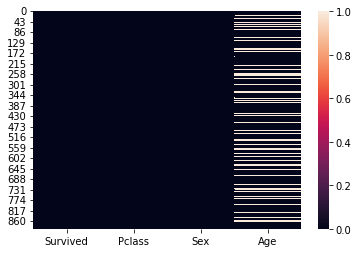

In [11]:
sns.heatmap(df_new.isnull())

In [12]:
df_new['Age']=df_new['Age'].fillna(df_new['Age'].mean())  #Replace the null value in age with mean
df_new

,Survived,Pclass,Sex,Age
0,0,3,male,22.000000
1,1,1,female,38.000000
2,1,3,female,26.000000
3,1,1,female,35.000000
4,0,3,male,35.000000
...,...,...,...,...
886,0,2,male,27.000000
887,1,1,female,19.000000
888,0,3,female,29.699118
889,1,1,male,26.000000


In [13]:
df_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

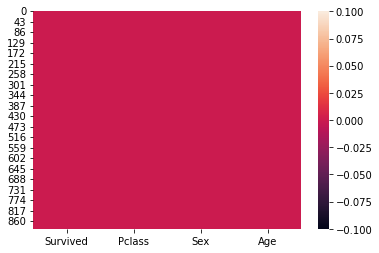

In [14]:
sns.heatmap(df_new.isnull())

In [15]:
df_new.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,13.002015
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,29.699118
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


In [16]:
df_new.count()

Survived    891
Pclass      891
Sex         891
Age         891
dtype: int64

In [17]:
df_new['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# Finding the Correlation

df_new_corr=df_new.corr()
df_new_corr

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.069809
Pclass,-0.338481,1.000000,-0.331339
Age,-0.069809,-0.331339,1.000000


### Visualization of data

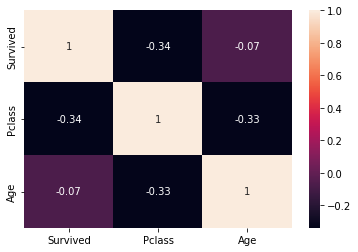

In [19]:
sns.heatmap(df_new_corr,annot=True)

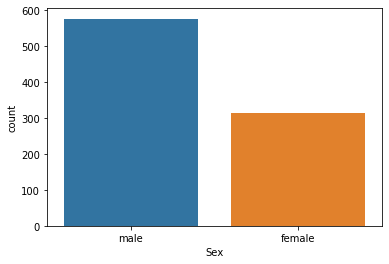

In [20]:
sns.countplot(df['Sex'])

In [21]:
df_new['Sex']=df_new['Sex'].map({'male':0,'female':1})

In [22]:
df_new

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
886,0,2,0,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,0,26.000000


In [23]:
df_new['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

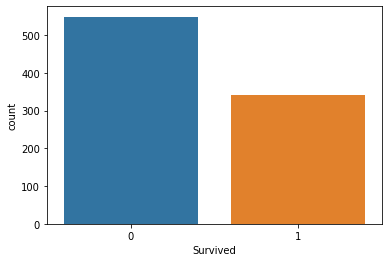

In [24]:
sns.countplot(df_new['Survived'])

Survived       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Pclass      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Sex         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Age               AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

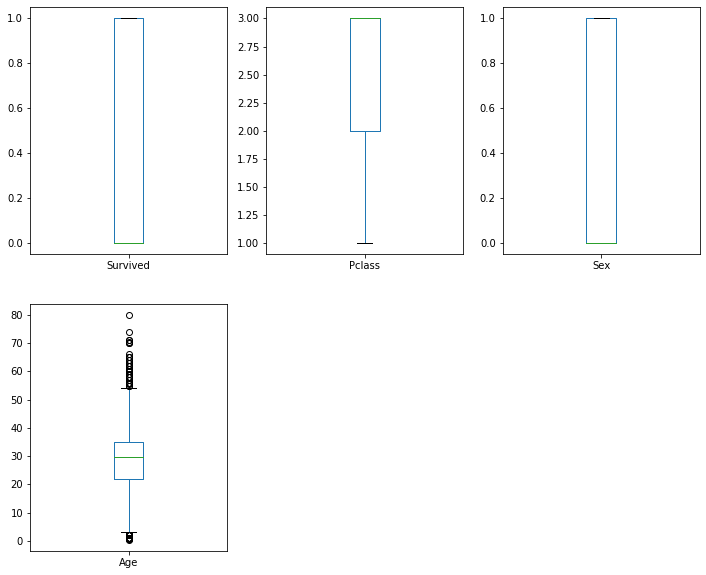

In [25]:
df_new.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,10))

Oultiers is present in age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296B1620E48>,
      dtype=object)

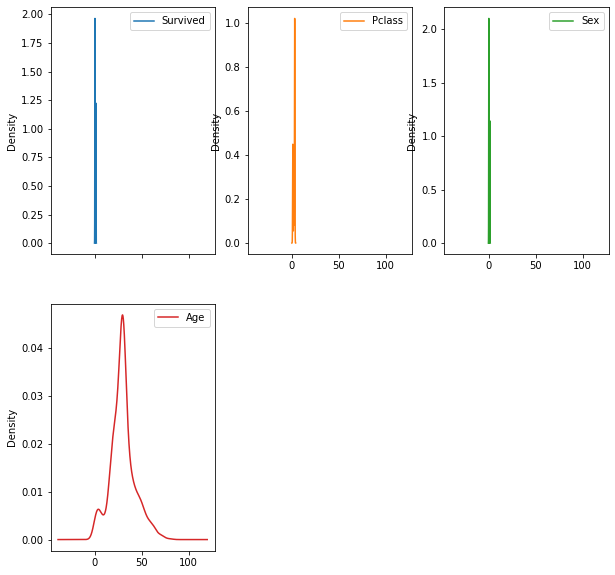

In [26]:
df_new.plot(kind='kde', subplots=True, layout=(2,3), figsize=(10,10))

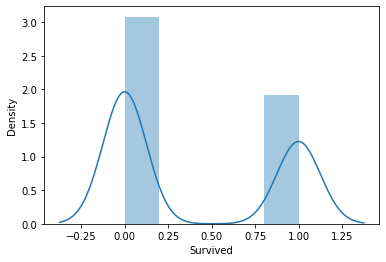

In [27]:
sns.distplot(df_new['Survived'])

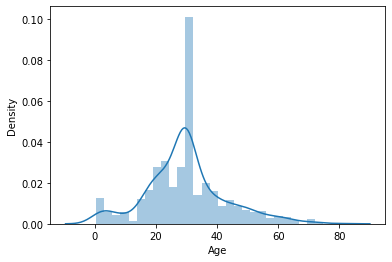

In [28]:
sns.distplot(df_new['Age'])

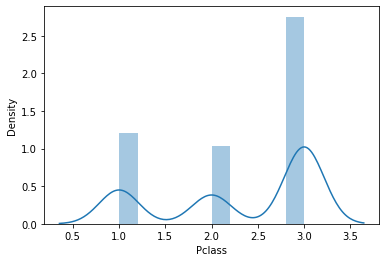

In [29]:
sns.distplot(df_new['Pclass'])

## Skewness

In [89]:
df_new.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
dtype: float64

In [91]:
skewed=np.log(df_new)
print(skewed)

     Survived    Pclass  Sex       Age
0        -inf  1.098612 -inf  3.091042
1         0.0  0.000000  0.0  3.637586
2         0.0  1.098612  0.0  3.258097
3         0.0  0.000000  0.0  3.555348
4        -inf  1.098612 -inf  3.555348
..        ...       ...  ...       ...
886      -inf  0.693147 -inf  3.295837
887       0.0  0.000000  0.0  2.944439
888      -inf  1.098612  0.0  3.391117
889       0.0  0.000000 -inf  3.258097
890      -inf  1.098612 -inf  3.465736

[891 rows x 4 columns]


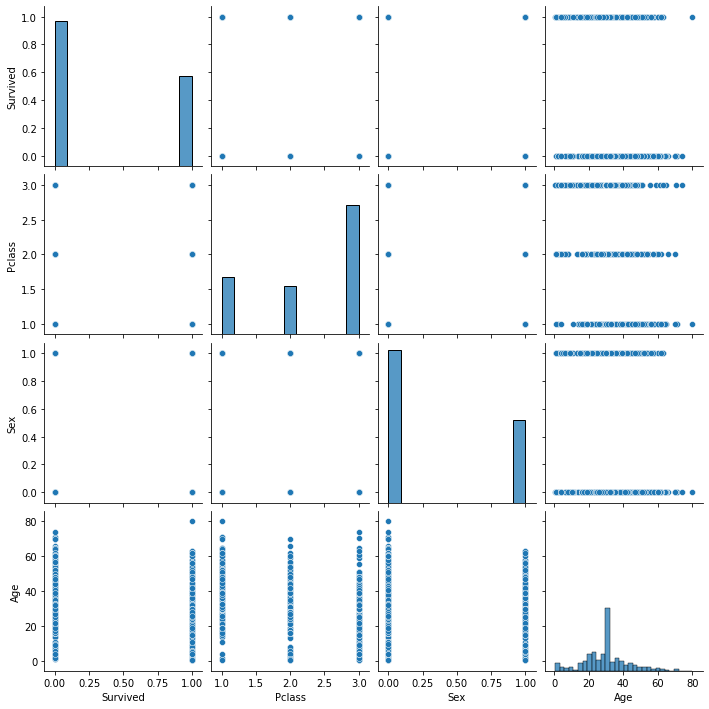

In [30]:
sns.pairplot(df_new)

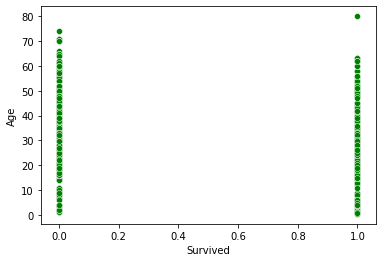

In [31]:
sns.scatterplot(x='Survived',y='Age',data=df_new,color='green')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

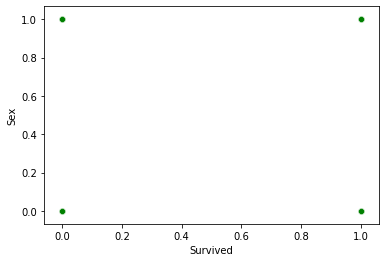

In [32]:
sns.scatterplot(x='Survived',y='Sex',data=df_new,color='green')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

# Removing the Outliers

In [33]:
# Removing the Outliers

z=np.abs(zscore(df_new))
z

array([[0.78927234, 0.82737724, 0.73769513, 0.5924806 ],
       [1.2669898 , 1.56610693, 1.35557354, 0.63878901],
       [1.2669898 , 0.82737724, 1.35557354, 0.2846632 ],
       ...,
       [0.78927234, 0.82737724, 1.35557354, 0.        ],
       [1.2669898 , 1.56610693, 0.73769513, 0.2846632 ],
       [0.78927234, 0.82737724, 0.73769513, 0.17706291]])

In [34]:
zscore(df_new)

array([[-0.78927234,  0.82737724, -0.73769513, -0.5924806 ],
       [ 1.2669898 , -1.56610693,  1.35557354,  0.63878901],
       [ 1.2669898 ,  0.82737724,  1.35557354, -0.2846632 ],
       ...,
       [-0.78927234,  0.82737724,  1.35557354,  0.        ],
       [ 1.2669898 , -1.56610693, -0.73769513, -0.2846632 ],
       [-0.78927234,  0.82737724, -0.73769513,  0.17706291]])

In [35]:
threshold=3
print(np.where(z>3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64), array([3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [36]:
z[116]

array([0.78927234, 0.82737724, 0.73769513, 3.13980541])

In [37]:
dfs=df_new[(z<3).all(axis=1)]
dfs

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
886,0,2,0,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,0,26.000000


In [38]:
df_new.shape

(891, 4)

In [39]:
dfs.shape # After removing the Outliers

(884, 4)

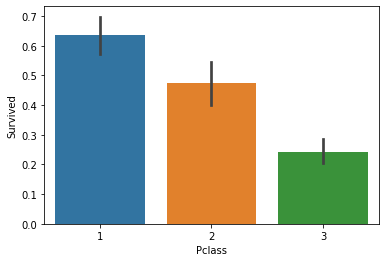

In [40]:
sns.barplot(x='Pclass',y='Survived',data=dfs)

In [41]:
x=dfs.drop('Survived',axis=1)
x

,Pclass,Sex,Age
0,3,0,22.000000
1,1,1,38.000000
2,3,1,26.000000
3,1,1,35.000000
4,3,0,35.000000
...,...,...,...
886,2,0,27.000000
887,1,1,19.000000
888,3,1,29.699118
889,1,0,26.000000


In [42]:
y=dfs['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 884, dtype: int64

## Scaling the data

In [43]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
print(x_scaled)

[[ 0.82377152 -0.74221102 -0.5901606 ]
 [-1.57561571  1.34732573  0.6925658 ]
 [ 0.82377152  1.34732573 -0.269479  ]
 ...
 [ 0.82377152  1.34732573  0.02708074]
 [-1.57561571 -0.74221102 -0.269479  ]
 [ 0.82377152 -0.74221102  0.2115434 ]]


### Training and testing the dataset

In [44]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.30,random_state=45)

In [45]:
train_x.shape

(618, 3)

In [46]:
test_x.shape

(266, 3)

In [47]:
train_y.shape

(618,)

In [48]:
test_y.shape

(266,)

### Variance Inflation Factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,1.154535,Pclass
1,1.034356,Sex
2,1.138073,Age


### Model Building

# Logistic Regression

In [50]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [51]:
lg_pred=lg.predict(test_x)
print(lg_pred)

[0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0]


In [52]:
lg.intercept_

array([-0.59809252])

In [53]:
lg.coef_

array([[-0.92756962,  1.20703192, -0.35330879]])

# Decision Tree Classifier

In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [72]:
dtc_pred=dtc.predict(test_x)
dtc_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [76]:
# KNearest Neighbors Classifier Model

knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [77]:
knn_pred=knn.predict(test_x)
print(knn_pred)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0]


In [79]:
# Support Vector Classifier Model

svm=SVC()
svm.fit(train_x,train_y)

SVC()

In [80]:
svm_pred=svm.predict(test_x)
print(svm_pred)

[0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


# Random Forest Classifier Model

In [82]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [83]:
rfc_pred=rfc.predict(test_x)
print(rfc_pred)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0]


In [55]:
for clf in (dtc,knn,svm,rfc,lg):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,clf_pred)*100)

DecisionTreeClassifier 78.94736842105263
KNeighborsClassifier 81.57894736842105
SVC 78.94736842105263
RandomForestClassifier 80.45112781954887
LogisticRegression 80.82706766917293


 KNeighborsClassifier gives a good accuracy 81.5% as compare with Other models. Let's do the hypertuning parameter to improve the accuracy

### Cross Validation


In [75]:
# Cross Validation in Logistic Regression
score=cross_val_score(lg,x,y,cv=5)
print("Cross Validation Score in Logistic Regression is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")
print("Accruacy is:",accuracy_score(test_y,lg_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,lg_pred),"\n")
print("Classification Report:\n",classification_report(test_y,lg_pred))

Cross Validation Score in Logistic Regression is:
 [0.77966102 0.79096045 0.78531073 0.77966102 0.79545455] 

Cross Validation Mean is: 0.7862095531587057
Cross Validation Standard Deviation is: 0.0062388372339487585 

Accruacy is: 0.8082706766917294 

Confusion Matrix is:
 [[144  25]
 [ 26  71]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       169
           1       0.74      0.73      0.74        97

    accuracy                           0.81       266
   macro avg       0.79      0.79      0.79       266
weighted avg       0.81      0.81      0.81       266



In [74]:
# Cross Validation in Decision Tree Classifier
score=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation Score in Decision Tree Classifier is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")
print("Accruacy is:",accuracy_score(test_y,dtc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,dtc_pred),"\n")
print("Classification Report:\n",classification_report(test_y,dtc_pred))

Cross Validation Score in Decision Tree Classifier is:
 [0.80225989 0.8079096  0.81355932 0.81920904 0.81818182] 

Cross Validation Mean is: 0.8122239342578326
Cross Validation Standard Deviation is: 0.0063869713638252945 

Accruacy is: 0.793233082706767 

Confusion Matrix is:
 [[146  23]
 [ 32  65]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       169
           1       0.74      0.67      0.70        97

    accuracy                           0.79       266
   macro avg       0.78      0.77      0.77       266
weighted avg       0.79      0.79      0.79       266



In [78]:
# Cross Validation in KNeighborsClassifier
score=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation Score in KNeighborsClassifier is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")
print("Accruacy is:",accuracy_score(test_y,knn_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,knn_pred),"\n")
print("Classification Report:\n",classification_report(test_y,knn_pred))

Cross Validation Score in KNeighborsClassifier is:
 [0.80225989 0.8079096  0.81355932 0.81920904 0.81818182] 

Cross Validation Mean is: 0.8122239342578326
Cross Validation Standard Deviation is: 0.0063869713638252945 

Accruacy is: 0.8157894736842105 

Confusion Matrix is:
 [[149  20]
 [ 29  68]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       169
           1       0.77      0.70      0.74        97

    accuracy                           0.82       266
   macro avg       0.80      0.79      0.80       266
weighted avg       0.81      0.82      0.81       266



In [81]:
# Cross Validation in Support Vector Classifier
score=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation Score in Support Vector Classifier is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")
print("Accruacy is:",accuracy_score(test_y,svm_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,svm_pred),"\n")
print("Classification Report:\n",classification_report(test_y,svm_pred))

Cross Validation Score in Support Vector Classifier is:
 [0.80225989 0.8079096  0.81355932 0.81920904 0.81818182] 

Cross Validation Mean is: 0.8122239342578326
Cross Validation Standard Deviation is: 0.0063869713638252945 

Accruacy is: 0.7894736842105263 

Confusion Matrix is:
 [[159  10]
 [ 46  51]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       169
           1       0.84      0.53      0.65        97

    accuracy                           0.79       266
   macro avg       0.81      0.73      0.75       266
weighted avg       0.80      0.79      0.78       266



In [84]:
# Cross Validation in RandomForestClassifier
score=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation Score in Random Forest Classifier is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")
print("Accruacy is:",accuracy_score(test_y,rfc_pred),"\n")
print("Confusion Matrix is:\n",confusion_matrix(test_y,rfc_pred),"\n")
print("Classification Report:\n",classification_report(test_y,rfc_pred))

Cross Validation Score in Random Forest Classifier is:
 [0.79661017 0.8079096  0.81355932 0.81920904 0.81818182] 

Cross Validation Mean is: 0.8110939907550077
Cross Validation Standard Deviation is: 0.008271524248257807 

Accruacy is: 0.7969924812030075 

Confusion Matrix is:
 [[144  25]
 [ 29  68]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       169
           1       0.73      0.70      0.72        97

    accuracy                           0.80       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.80      0.80      0.80       266



### HyperTuning parameter

In [59]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [60]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=3,n_jobs=1,verbose=3)

In [61]:
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.811 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.772 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.782 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.757 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 2/3] END criter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [62]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'random'}

In [63]:
grid_search.best_score_*100

81.3915857605178

Previous in DecisionTreeClassifier the score we got is 79.3 and after hyper parameter tuning we got the 81. Thus we have improve the accuracy little bit as we got before.

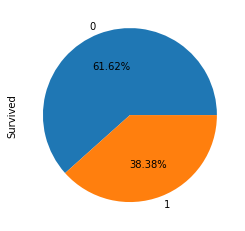

In [64]:

df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

From above chart we see that 38.38% of people survived.

In [65]:
print("Predicted Survived\n",lg_pred,"\n")
print("Actual Survived\n",test_y)

Predicted Survived
 [0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0] 

Actual Survived
 582    0
145    0
389    1
113    0
186    1
      ..
694    0
756    0
6      0
648    0
783    0
Name: Survived, Length: 266, dtype: int64


In [66]:
df.to_csv('Titanic_Survival.csv')

# Saving the model

In [67]:
import pickle
filename='Titanic_survival_prediction.pickle'
pickle.dump(knn,open(filename,'wb'))

In [86]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)